In [1]:
#Importing module
#imports
#numpy,pandas,scipy, math, matplotlib
import numpy as np
import pandas as pd
import scipy
from math import sqrt
import matplotlib.pyplot as plt

In [2]:
#estimators
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR

In [3]:
#model metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

In [4]:
#cross validation
from sklearn.model_selection import train_test_split

In [5]:
#data
rawData = pd.read_csv('extract_data_out.csv', header=1)
rawData.head()

,0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,1,20000,female,university,1,24,2,2,-1,...,0,0,0,0,689,0,0,0,0,default
1,2,2,120000,female,university,2,26,-1,2,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,default
2,3,3,90000,female,university,2,34,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,not default
3,4,4,50000,female,university,1,37,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,not default
4,5,5,50000,male,university,1,57,-1,0,-1,...,20940,19146,19131,2000,36681,10000,9000,689,679,not default


In [6]:
# Import label encoder 
from sklearn import preprocessing

In [7]:
# label_encoder object  
label_encoder = preprocessing.LabelEncoder()

In [8]:
# Encode labels in column 'default payment next month'. 
rawData['default payment next month']= label_encoder.fit_transform(rawData['default payment next month'])

In [9]:
rawData['default payment next month'].unique()

array([1, 3, 0, 2])

In [10]:
#first five raws
rawData.head()

,0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,1,20000,female,university,1,24,2,2,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,2,120000,female,university,2,26,-1,2,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,3,90000,female,university,2,34,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,3
3,4,4,50000,female,university,1,37,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,3
4,5,5,50000,male,university,1,57,-1,0,-1,...,20940,19146,19131,2000,36681,10000,9000,689,679,3


In [11]:
#data structure
rawData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30203 entries, 0 to 30202
Data columns (total 26 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   0                           30203 non-null  int64 
 1   ID                          30202 non-null  object
 2   LIMIT_BAL                   30203 non-null  object
 3   SEX                         30203 non-null  object
 4   EDUCATION                   30203 non-null  object
 5   MARRIAGE                    30203 non-null  object
 6   AGE                         30203 non-null  object
 7   PAY_0                       30203 non-null  object
 8   PAY_2                       30203 non-null  object
 9   PAY_3                       30203 non-null  object
 10  PAY_4                       30203 non-null  object
 11  PAY_5                       30203 non-null  object
 12  PAY_6                       30203 non-null  object
 13  BILL_AMT1                   30203 non-null  ob

In [12]:
#datatypes
rawData.dtypes

0                              int64
ID                            object
LIMIT_BAL                     object
SEX                           object
EDUCATION                     object
MARRIAGE                      object
AGE                           object
PAY_0                         object
PAY_2                         object
PAY_3                         object
PAY_4                         object
PAY_5                         object
PAY_6                         object
BILL_AMT1                     object
BILL_AMT2                     object
BILL_AMT3                     object
BILL_AMT4                     object
BILL_AMT5                     object
BILL_AMT6                     object
PAY_AMT1                      object
PAY_AMT2                      object
PAY_AMT3                      object
PAY_AMT4                      object
PAY_AMT5                      object
PAY_AMT6                      object
default payment next month     int32
dtype: object

In [13]:
# Update data types to numeric. 
cols = ['ID','LIMIT_BAL','MARRIAGE','AGE','PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6','BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6','PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6', 'default payment next month']
rawData[cols] = rawData[cols].apply(pd.to_numeric, errors='coerce')

In [14]:
#First five rows
rawData.head()

,0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,1.0,20000.0,female,university,1.0,24.0,2.0,2.0,-1.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,2.0,120000.0,female,university,2.0,26.0,-1.0,2.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,3.0,90000.0,female,university,2.0,34.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,3
3,4,4.0,50000.0,female,university,1.0,37.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,3
4,5,5.0,50000.0,male,university,1.0,57.0,-1.0,0.0,-1.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,3


In [15]:
#datatypes
rawData.dtypes

0                               int64
ID                            float64
LIMIT_BAL                     float64
SEX                            object
EDUCATION                      object
MARRIAGE                      float64
AGE                           float64
PAY_0                         float64
PAY_2                         float64
PAY_3                         float64
PAY_4                         float64
PAY_5                         float64
PAY_6                         float64
BILL_AMT1                     float64
BILL_AMT2                     float64
BILL_AMT3                     float64
BILL_AMT4                     float64
BILL_AMT5                     float64
BILL_AMT6                     float64
PAY_AMT1                      float64
PAY_AMT2                      float64
PAY_AMT3                      float64
PAY_AMT4                      float64
PAY_AMT5                      float64
PAY_AMT6                      float64
default payment next month      int32
dtype: objec

In [16]:
#Converting non numerical column to numerical
rawData = pd.get_dummies(rawData)

In [17]:
#datatypes
rawData.dtypes

0                               int64
ID                            float64
LIMIT_BAL                     float64
MARRIAGE                      float64
AGE                           float64
PAY_0                         float64
PAY_2                         float64
PAY_3                         float64
PAY_4                         float64
PAY_5                         float64
PAY_6                         float64
BILL_AMT1                     float64
BILL_AMT2                     float64
BILL_AMT3                     float64
BILL_AMT4                     float64
BILL_AMT5                     float64
BILL_AMT6                     float64
PAY_AMT1                      float64
PAY_AMT2                      float64
PAY_AMT3                      float64
PAY_AMT4                      float64
PAY_AMT5                      float64
PAY_AMT6                      float64
default payment next month      int32
SEX_SEX                         uint8
SEX_X2                          uint8
SEX_female  

In [18]:
# CHECK FOR MISSING VALUES!!!!!!!!!!
print(rawData.isnull().sum())

0                             0
ID                            2
LIMIT_BAL                     2
MARRIAGE                      2
AGE                           2
PAY_0                         2
PAY_2                         2
PAY_3                         2
PAY_4                         2
PAY_5                         2
PAY_6                         2
BILL_AMT1                     2
BILL_AMT2                     2
BILL_AMT3                     2
BILL_AMT4                     2
BILL_AMT5                     2
BILL_AMT6                     2
PAY_AMT1                      2
PAY_AMT2                      2
PAY_AMT3                      2
PAY_AMT4                      2
PAY_AMT5                      2
PAY_AMT6                      2
default payment next month    0
SEX_SEX                       0
SEX_X2                        0
SEX_female                    0
SEX_male                      0
EDUCATION_EDUCATION           0
EDUCATION_X3                  0
EDUCATION_graduate school     0
EDUCATIO

In [19]:
# Where is the missing data? 
rawData[rawData['ID'].isnull()].index.tolist()

[201, 202]

In [20]:
# Row 201 and 202. Let's print 200 through 203. Yep there they are. 
print(rawData.loc[200:203, :])

       0     ID  LIMIT_BAL  MARRIAGE   AGE  PAY_0  PAY_2  PAY_3  PAY_4  PAY_5  \
200  201  201.0   180000.0       1.0  38.0   -2.0   -2.0   -2.0   -2.0   -2.0   
201  202    NaN        NaN       NaN   NaN    NaN    NaN    NaN    NaN    NaN   
202  203    NaN        NaN       NaN   NaN    NaN    NaN    NaN    NaN    NaN   
203  204    1.0    20000.0       1.0  24.0    2.0    2.0   -1.0   -1.0   -2.0   

     ...  SEX_SEX  SEX_X2  SEX_female  SEX_male  EDUCATION_EDUCATION  \
200  ...        0       0           1         0                    0   
201  ...        0       1           0         0                    0   
202  ...        1       0           0         0                    1   
203  ...        0       0           1         0                    0   

     EDUCATION_X3  EDUCATION_graduate school  EDUCATION_high school  \
200             0                          1                      0   
201             1                          0                      0   
202             0   

In [21]:
# Let's drop those rows
rawData = rawData.drop(rawData.index[201:203])

In [22]:
# Did it work? 
print(rawData.isnull().sum())

0                             0
ID                            0
LIMIT_BAL                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
SEX_SEX                       0
SEX_X2                        0
SEX_female                    0
SEX_male                      0
EDUCATION_EDUCATION           0
EDUCATION_X3                  0
EDUCATION_graduate school     0
EDUCATIO

In [23]:
rawData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30201 entries, 0 to 30202
Data columns (total 34 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   0                           30201 non-null  int64  
 1   ID                          30201 non-null  float64
 2   LIMIT_BAL                   30201 non-null  float64
 3   MARRIAGE                    30201 non-null  float64
 4   AGE                         30201 non-null  float64
 5   PAY_0                       30201 non-null  float64
 6   PAY_2                       30201 non-null  float64
 7   PAY_3                       30201 non-null  float64
 8   PAY_4                       30201 non-null  float64
 9   PAY_5                       30201 non-null  float64
 10  PAY_6                       30201 non-null  float64
 11  BILL_AMT1                   30201 non-null  float64
 12  BILL_AMT2                   30201 non-null  float64
 13  BILL_AMT3                   302

In [24]:
#features # OMIT 23 ITS YOUR DEPENDANT but include the new dummy features
X = rawData.iloc[:,[1,2,3,13,14,15,16,17,18,19,20,21,22,24,25,26,27,28,29,30,31,32,33]]
print('Summary of feature sample')
X.head()

Summary of feature sample


,ID,LIMIT_BAL,MARRIAGE,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,...,SEX_SEX,SEX_X2,SEX_female,SEX_male,EDUCATION_EDUCATION,EDUCATION_X3,EDUCATION_graduate school,EDUCATION_high school,EDUCATION_other,EDUCATION_university
0,1.0,20000.0,1.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,...,0,0,1,0,0,0,0,0,0,1
1,2.0,120000.0,2.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,...,0,0,1,0,0,0,0,0,0,1
2,3.0,90000.0,2.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,...,0,0,1,0,0,0,0,0,0,1
3,4.0,50000.0,1.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,...,0,0,1,0,0,0,0,0,0,1
4,5.0,50000.0,1.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,...,0,0,0,1,0,0,0,0,0,1


In [25]:
# Dropping the missing data rows changed the dependant to 2 values. As it should be
rawData['default payment next month'].unique()

array([1, 3])

In [26]:
#Dependent variable
y = rawData['default payment next month']

In [27]:
#Dependent variable first five rows
y.head()

0    1
1    1
2    3
3    3
4    3
Name: default payment next month, dtype: int32

In [28]:
#dependent variable
print(y)

0        1
1        1
2        3
3        3
4        3
        ..
30198    3
30199    3
30200    1
30201    1
30202    1
Name: default payment next month, Length: 30201, dtype: int32


In [29]:
#Training the model
#Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .25, random_state = 0)

In [30]:
#Modeling 
algosClass = []
algosClass.append(('Random Forest Regressor',RandomForestRegressor()))
algosClass.append(('Linear Regression',LinearRegression()))
algosClass.append(('Support Vector Regression',SVR()))

In [31]:
#regression # THIS NEEDS TO BE XTRAIN AND YTRAIN
results = []
names = []
for name, model in algosClass: 
    result = cross_val_score(model, X_train, y_train, cv=3, scoring='r2') 
    names.append(name) 
    results.append(result)

In [32]:
#Testing the model
for i in range(len(names)):
    print(names[i],results[i])

Random Forest Regressor [0.07678005 0.08777011 0.07982849]
Linear Regression [0.03143838 0.02892721 0.03533773]
Support Vector Regression [-0.16184744 -0.180678   -0.16866798]


In [33]:
#Testing the model
for i in range(len(names)):
    print(names[i],results[i].mean())

Random Forest Regressor 0.0814595492667864
Linear Regression 0.031901109406426875
Support Vector Regression -0.17039780983632502


In [34]:
#choosing Random Forest Regresson to train the model
algo = RandomForestRegressor()

In [35]:
#model
model = algo.fit(X_train,y_train)

In [36]:
#building function for calculating RMSE
predictions = model.predict(X_test)
rmse = sqrt(mean_squared_error(y_test, predictions))

In [37]:
#calculating r2
predRsquared = r2_score(y_test,predictions)

In [38]:
#Make Predictions
predictions = model.predict(X_test)
predRsquared = r2_score(y_test,predictions)
rmse = sqrt(mean_squared_error(y_test, predictions))
print('R Squared: %.3f' % predRsquared)
print('RMSE: %.3f' % rmse)

R Squared: 0.088
RMSE: 0.792


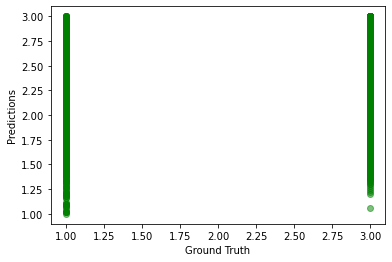

In [39]:
#plotting the result to compare knonw value in the test set and the prediction made
plt.scatter(y_test, predictions, color=['g'], alpha = 0.5)
plt.xlabel('Ground Truth')
plt.ylabel('Predictions')
plt.show();